<a href="https://colab.research.google.com/github/campbellmath001/mathematical_musings/blob/main/logistic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remixed from:
https://www.johndcook.com/blog/2020/01/11/logistic-bifurcation-diagram/

and

https://blbadger.github.io/logistic-map.html#mjx-eqn-eq1

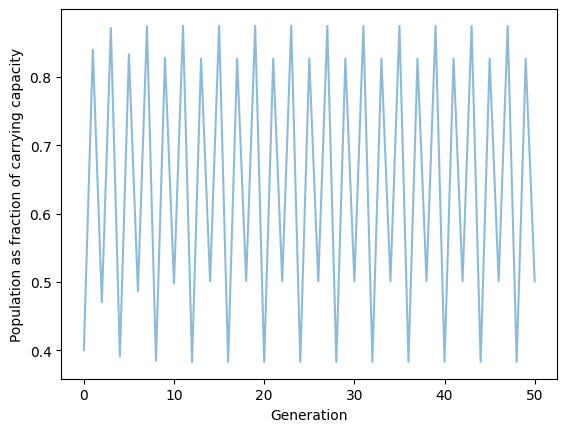

In [ ]:
#@title logistic map time series  { vertical-output: true }
#! python3
# import third-party libraries
from matplotlib import pyplot as plt
import numpy as np

#@markdown Initial Population as a fraction of carrying capacity
Initial_Population = 0.4 #@param {type: "number"}
Reproduction_Rate = 3.5 #@param {type: "number"}
generations = 50 #@param {type: "number"}


# initialize an array of 0s and specify starting values and r constant
steps = generations
x = np.arange(steps + 1)
y = np.zeros(steps + 1)

y[0] = Initial_Population

r = Reproduction_Rate

# loop over the steps and replace array values with calculations
for i in range(steps):
	y[i+1] = r * y[i] * (1 - y[i])

# plot the figure!
fig, ax = plt.subplots()
ax.plot(x, y, alpha=0.5)
ax.set(xlabel='Generation', ylabel='Population as fraction of carrying capacity')
plt.show()


In [ ]:
#@title Functions to Determine the Attractor Set for Each value r

# apply the logistic map
def logmap(x,r):
  return r*x*(1-x)

#compute the population at a given generation
def iter_logmap(initial_population, reproduction_rate, number_of_iterations):
  x = initial_population
  for _ in range(number_of_iterations):
    x = logmap(x,reproduction_rate)
  return x

#check the tail of a sequence for attractors.  tolerance is number of decimal places to keep
def attractors(initial_population, reproduction_rate, tail_start, tail_length, tolerance):
  #get the population at the start of the tail
  x = iter_logmap(initial_population, reproduction_rate, tail_start)
  #the first attractor will be the population at the start of the tail rounded to tolerance
  attractor_1 = round(x, tolerance)
  #create a set to contain the attractors
  attractor_set = {attractor_1}

  #iterate through the finite segment of the tail determined by tail_length
  for _ in range(tail_length):
    x = logmap(x,reproduction_rate)
    x_rounded = round(x, tolerance)
    if x_rounded in attractor_set:
      #we closed the orbit
      return attractor_set
    else:
      #we have not seen this value before
      attractor_set.add(x_rounded)
  return attractor_set







NameError: ignored

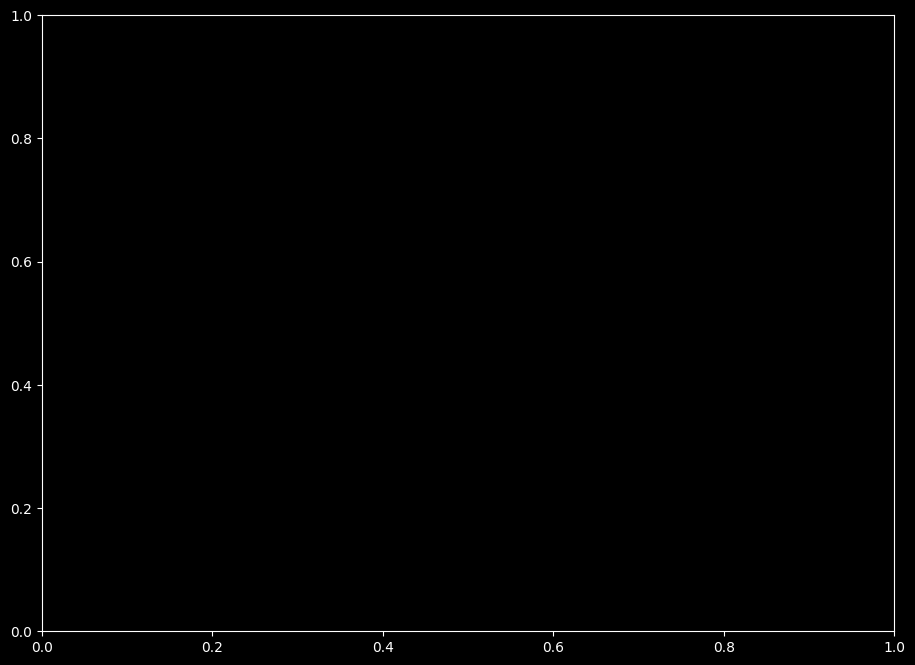

In [ ]:
#@title r between 0 and 4 { vertical-output: true }
import numpy as np
import matplotlib.pyplot as plt

Initial_Population = 0.1 #@param {type: "number"}
tail_start = 100 #@param {type: "number"}
tail_length = 1000 #@param {type: "number"}
tolerance = 4 #@param {type: "number"}
number_of_r_values = 10000 #@param {type: "number"}

#create a set of r values to investigate
r_values = np.linspace(0, 4, number_of_r_values)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (11,8))

#for each r value determine a set of attractor points
for r in r_values:
    attractor_set = attractors(Initial_Population, r, tail_start, tail_length, tolerance)
    for a in attractor_set:
      ax.plot(r, a, "^", color = "white", alpha = 0.4, markersize=.5)

plt.show()

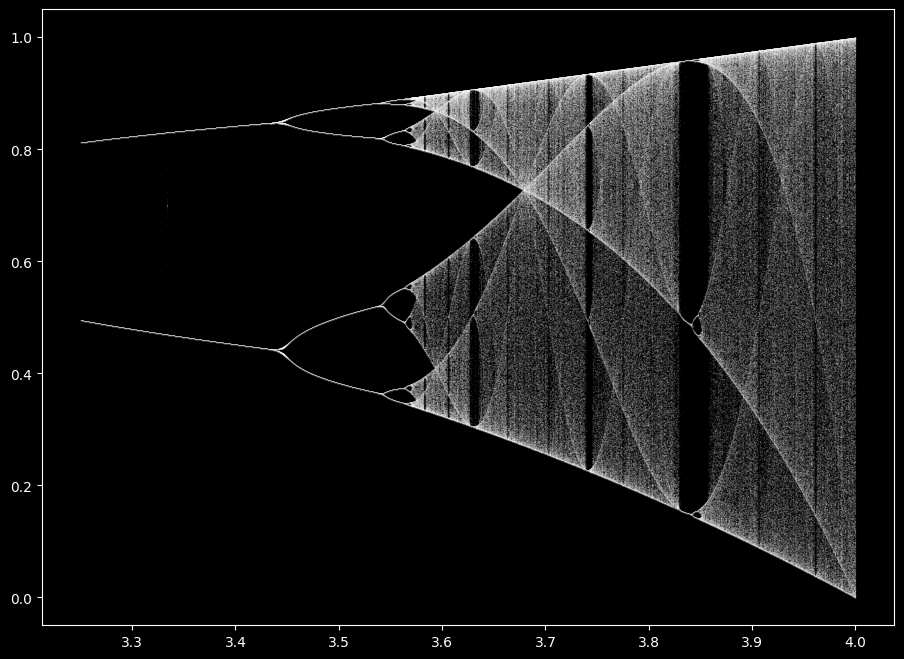

In [ ]:
#@title r between 3.25 and 4 { vertical-output: true }
import numpy as np
import matplotlib.pyplot as plt

Initial_Population = 0.1 #@param {type: "number"}
tail_start = 100 #@param {type: "number"}
tail_length = 1000 #@param {type: "number"}
tolerance = 4 #@param {type: "number"}
number_of_r_values = 10000 #@param {type: "number"}

#create a set of r values to investigate
r_values = np.linspace(3.25, 4, number_of_r_values)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (11,8))

#for each r value determine a set of attractor points
for r in r_values:
    attractor_set = attractors(Initial_Population, r, tail_start, tail_length, tolerance)
    for a in attractor_set:
      ax.plot(r, a, "^", color = "white", alpha = 0.4, markersize=.05)

plt.show()

#Tuesday July 18, 2023
http://www.physics.drexel.edu/~bob/PHYS750_NLD/ch2.pdf
-info about "period windows"

https://personalpages.manchester.ac.uk/staff/yanghong.huang/teaching/MATH36032/html/bifurmap.html
-algorithm I want to implement

for each R start with 500 random points between 0 and 1.  Then use numpy array to follow the path of those 500 points.  Plot the unique points that remain after n iterations.


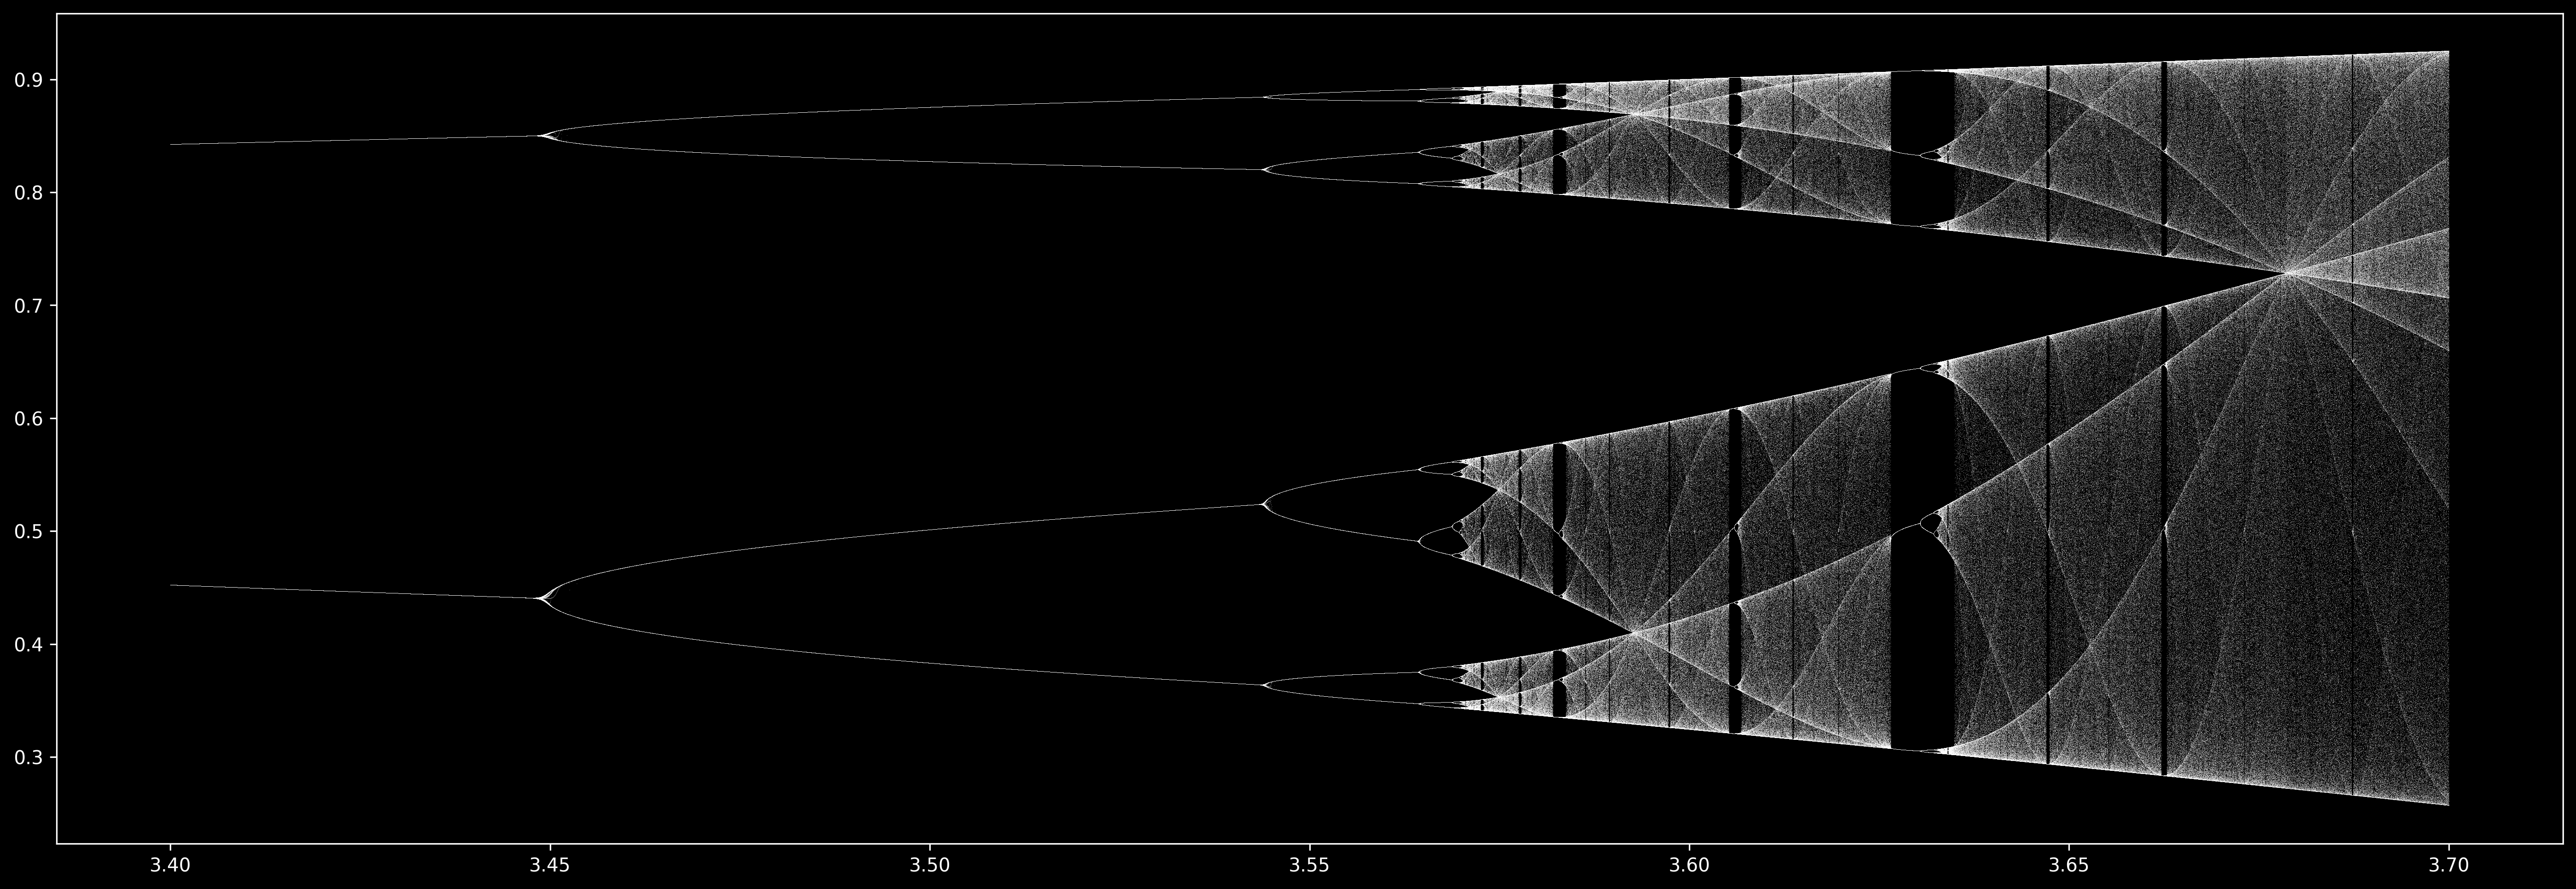

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#maximum number of attractors for each r value
number_of_test_points = 500 #@param {type: "number"}

#number of iterations
iterations = 1000 #@param {type: "number"}

#how many r values to consider
number_of_r_values = 10000 #@param {type: "number"}

# function to apply the logistic map
def logmap(x,r):
  return r*x*(1-x)

#create a plot
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (24,8))

fig.set_dpi(300)

#the starting array
Y = np.random.rand(number_of_test_points)

#for each r value estimate the attractor points
for r in np.linspace(3.4, 3.7, number_of_r_values):
  #generate an array of seed points
  X = Y
  #iterate the logistic map on each point in the seed array
  for _ in range(iterations):
    X = logmap(X,r)
  #plot the estimated attractor points
  ax.plot(r*np.ones(number_of_test_points), X, ",", color = "white", alpha = 0.4, markersize=.001, linestyle = 'none')

#display final plot
plt.show()

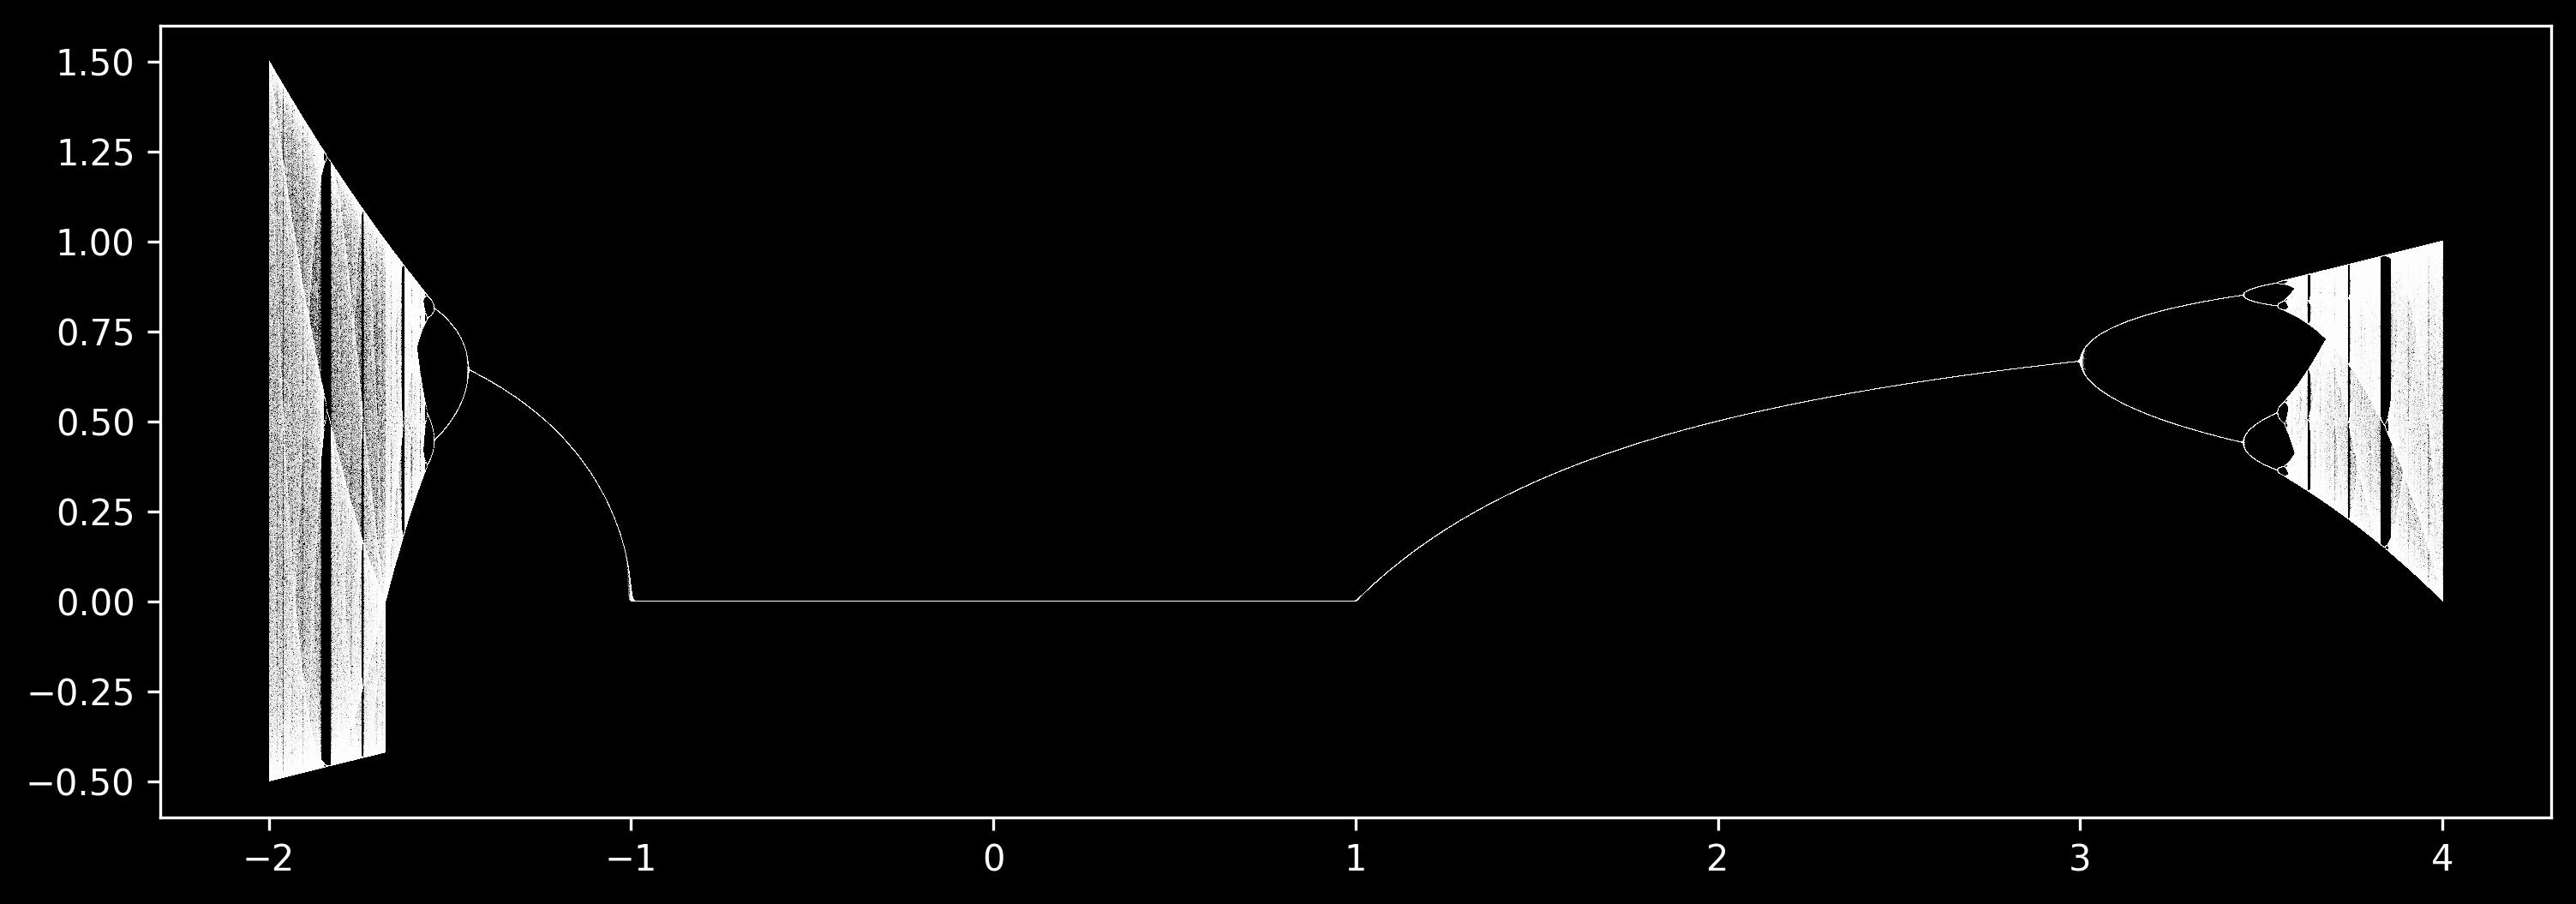

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#maximum number of attractors for each r value
number_of_test_points = 1000 #@param {type: "number"}

#number of iterations
iterations = 500 #@param {type: "number"}

#how many r values to consider
number_of_r_values = 10000 #@param {type: "number"}

# function to apply the logistic map
def logmap(x,r):
  return r*x*(1-x)

#create a plot
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (12,4))

fig.set_dpi(300)

#the starting array
Y = np.random.rand(number_of_test_points)

#for each r value estimate the attractor points
for r in np.linspace(-2, 4, number_of_r_values):
  #generate an array of seed points
  X = Y
  #iterate the logistic map on each point in the seed array
  for _ in range(iterations):
    X = logmap(X,r)
  #plot the estimated attractor points
  ax.plot(r*np.ones(number_of_test_points), X, ",", color = "white", alpha = 0.4, markersize=.01)

#display final plot
plt.show()